In [94]:
# import libraries 
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import newsrc.population as p
import newsrc.model as m
import newsrc.simulation as s


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
try:
    input_args = json.loads(open('../input/simulation.json').read())
except Exception as ex:
    print('simulation.json does not exist!')
    print(ex)

In [96]:
simulation =  s.Simulation()

/Users/bojansimoski/dev/eur/ABM-PA/newsrc/simulation.py:28: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.PeerNominatedDataPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-96-a3380912ab34>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  simulation =  s.Simulation()
/Users/bojansimoski/dev/eur/ABM-PA/newsrc/simulation.py:29: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.CommunicationDataPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


In [97]:
results_comm, results_avg_comm, agents_per_intervention_comm = simulation.simulate_interventions(365,'communication')

In [98]:
results_nomm, results_avg_nomm, agents_per_intervention_nomm = simulation.simulate_interventions(365,'peer')

In [68]:
# res_list = []
# for outer_dict in agents_per_intervention.items():
#     for intervention in outer_dict[1]:
#         if(intervention != 'nointervention'):
#             res_list.append([outer_dict[0],intervention,outer_dict[1][intervention]])

# res_list = pd.DataFrame(res_list, columns = ["SchoolClass", "Intervention", "InfluenceAgents"])
# res_list.to_excel('agents.xlsx')  

In [99]:
success_rates_comm = simulation.getSuccessRates(results_avg_comm)
success_rates_nomm = simulation.getSuccessRates(results_avg_nomm)
display(success_rates_nomm,success_rates_comm)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
0,78.0,nointervention,4.91,1.331345,1.396758
1,78.0,outdegree,4.26,1.362908,1.420981
2,78.0,indegree,4.76,1.370481,1.435679
3,78.0,closeness,4.76,1.370481,1.435679
4,78.0,betweenness,4.59,1.368358,1.431194
...,...,...,...,...,...
100,303.0,nointervention,17.54,1.553262,1.825781
101,303.0,outdegree,16.38,1.590690,1.851287
102,303.0,indegree,16.26,1.595105,1.854461
103,303.0,closeness,16.26,1.595105,1.854461


,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
0,78.0,nointervention,-1.27,1.298317,1.281816
1,78.0,outdegree,1.07,1.336777,1.351037
2,78.0,indegree,1.74,1.340426,1.363792
3,78.0,closeness,0.00,1.337507,1.337513
4,78.0,betweenness,0.00,1.337507,1.337513
...,...,...,...,...,...
100,303.0,nointervention,1.67,1.553262,1.579220
101,303.0,outdegree,4.57,1.593926,1.666812
102,303.0,indegree,8.41,1.590690,1.724397
103,303.0,closeness,8.41,1.590690,1.724397


In [100]:
display(success_rates_nomm.groupby(['Intervention'])['SuccessRate'].mean(),success_rates_comm.groupby(['Intervention'])['SuccessRate'].mean())

Intervention
betweenness       16.271905
closeness         17.606667
indegree          17.458095
nointervention    15.549524
outdegree         15.001429
Name: SuccessRate, dtype: float64

Intervention
betweenness       15.847619
closeness         16.252857
indegree          15.716667
nointervention    14.872381
outdegree         15.775238
Name: SuccessRate, dtype: float64

In [101]:
success_rates_comm = success_rates_comm[success_rates_comm.Intervention.isin(['indegree','betweenness','closeness','outdegree'])]
sr_mean_comm = success_rates_comm.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

success_rates_nomm = success_rates_nomm[success_rates_nomm.Intervention.isin(['indegree','betweenness','closeness','outdegree'])]
sr_mean_nomm = success_rates_nomm.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

display(sr_mean_nomm,sr_mean_comm)

,SchoolClass,SuccessRate
0,100.0,11.6550
1,124.0,15.6375
2,125.0,9.3375
3,256.0,59.2475
4,258.0,16.8175
5,261.0,9.2550
6,262.0,28.3875
7,263.0,12.2275
8,272.0,16.5700
9,273.0,19.6075


,SchoolClass,SuccessRate
0,100.0,20.2925
1,124.0,28.2575
2,125.0,8.3000
3,256.0,41.2125
4,258.0,33.5900
5,261.0,9.6350
6,262.0,18.0050
7,263.0,10.2350
8,272.0,22.5200
9,273.0,16.9075


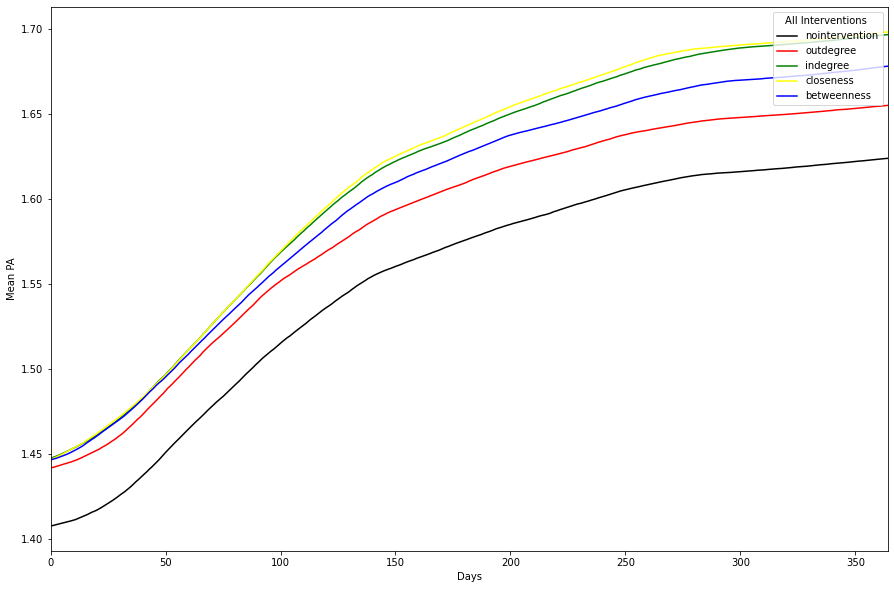

In [102]:
simulation.plot_interventions_averaged(results_avg_nomm)

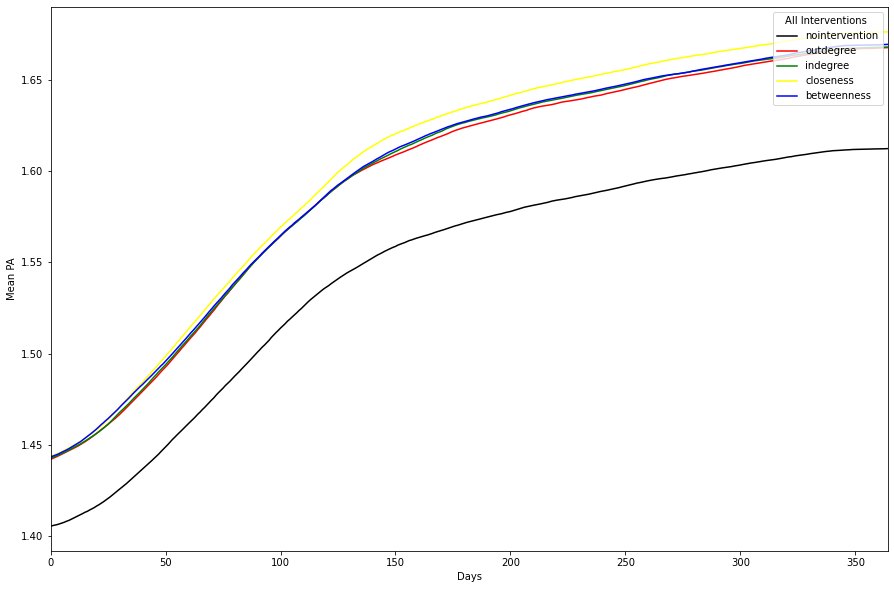

In [103]:
simulation.plot_interventions_averaged(results_avg_comm)

In [104]:
pop_details_peer, agents_details_peer = simulation.PeerNominatedDataPopulation.population_network_summary(simulation.PeerNominatedDataPopulation.graph)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


In [105]:
agents_details_peer

,ParticipantID,SchoolClassID,Gender,PA,BMI,Environment,InDegree,OutDegree,EigenVector,Closeness,Betweenness
18,1605,81.0,1,1.031893,-1.0,0.583333,8,18,0.194411,0.620690,0.043321
19,1606,81.0,1,1.322073,-1.0,0.488193,13,13,0.286191,0.782609,0.056189
20,1607,81.0,0,1.595759,-1.0,0.333333,7,8,0.167096,0.620690,0.016476
21,1608,81.0,1,1.197837,-1.0,0.916667,10,18,0.232810,0.692308,0.042131
22,1609,81.0,1,0.960113,-1.0,0.333333,8,7,0.190353,0.620690,0.002682
...,...,...,...,...,...,...,...,...,...,...,...
403,6085,303.0,0,1.964469,-1.0,0.333333,7,5,0.109432,0.585366,0.000302
404,6086,303.0,0,1.281375,-1.0,0.666667,8,6,0.121969,0.600000,0.003248
405,6088,303.0,1,1.103620,-1.0,0.333333,10,10,0.183015,0.631579,0.004006
406,6089,303.0,1,1.171215,-1.0,0.500000,12,11,0.211682,0.666667,0.008951


In [106]:
pop_details_peer

,SchoolClassID,NumberOfAgents,PercentageFemale,NumberConnections,Density,IsolatedNodes,CentralizationInDegree,CentralizationOutDegree,CentralizationCloseness,CentralizationBetweenness,DegreeAssortativity,AverageEnvironmentScore,AverageBMIScore
0,78.0,18,55,114,0.37,0,0.43,0.68,-0.38,-0.52,-0.55,0.59,-1.0
1,81.0,19,52,184,0.54,0,0.29,0.52,-0.47,-0.12,0.04,0.48,-1.0
2,100.0,19,36,171,0.50,0,0.35,0.56,-0.66,-0.27,-0.33,0.56,-1.0
3,124.0,17,64,181,0.67,0,0.27,0.38,-1.21,-0.12,-0.23,0.53,-1.0
4,125.0,16,56,132,0.55,0,0.42,0.51,-1.71,-0.21,-0.04,0.50,-1.0
5,256.0,22,54,154,0.33,0,0.35,0.73,-0.43,-0.28,NaN,0.37,-1.0
6,258.0,16,62,102,0.42,0,0.49,0.43,-1.83,-0.33,-0.12,0.32,-1.0
7,261.0,17,35,137,0.50,0,0.38,0.56,-0.74,-0.50,-0.12,0.46,-1.0
8,262.0,15,46,83,0.40,0,0.67,0.46,-6.18,-0.51,-0.02,0.47,-1.0
9,263.0,20,65,163,0.43,0,0.43,0.63,-0.54,-0.26,-0.18,0.39,-1.0


In [107]:
pop_details_comm, agents_details_comm = simulation.CommunicationDataPopulation.population_network_summary(simulation.CommunicationDataPopulation.graph)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/mixing.py:208: RuntimeWarning: invalid value encountered in true_divide
  a = a / a.sum()


In [108]:
pop_details_comm

,SchoolClassID,NumberOfAgents,PercentageFemale,NumberConnections,Density,IsolatedNodes,CentralizationInDegree,CentralizationOutDegree,CentralizationCloseness,CentralizationBetweenness,DegreeAssortativity,AverageEnvironmentScore,AverageBMIScore
0,78.0,17,58,42,0.15,1,0.67,0.67,-0.29,-0.42,0.16,0.56,-1.0
1,81.0,19,52,71,0.21,0,0.57,0.89,-0.27,-0.69,-0.33,0.48,-1.0
2,100.0,19,36,92,0.27,0,0.55,0.60,-0.23,-0.35,-0.09,0.56,-1.0
3,124.0,17,64,76,0.28,0,0.60,0.80,-0.53,-1.31,-0.02,0.53,-1.0
4,125.0,16,56,73,0.30,0,0.52,0.80,-0.36,-0.64,-0.06,0.50,-1.0
5,256.0,21,57,65,0.15,0,0.50,0.61,-0.18,-0.77,-0.01,0.37,-1.0
6,258.0,16,62,33,0.14,1,0.88,0.88,-0.54,-0.39,-0.24,0.32,-1.0
7,261.0,17,35,90,0.33,0,0.56,0.76,-0.68,-1.15,-0.15,0.46,-1.0
8,262.0,15,46,62,0.30,0,0.59,0.81,-0.30,-1.77,-0.14,0.47,-1.0
9,263.0,20,65,163,0.43,0,0.37,0.63,-0.37,-0.31,NaN,0.39,-1.0


In [109]:
agents_details_comm

,ParticipantID,SchoolClassID,Gender,PA,BMI,Environment,InDegree,OutDegree,EigenVector,Closeness,Betweenness
17,1605.0,81.0,1,1.031893,-1.0,0.583333,1,2,0.060594,0.314815,0.000000
18,1606.0,81.0,1,1.322073,-1.0,0.488193,2,1,0.123388,0.364899,0.000000
19,1607.0,81.0,0,1.595759,-1.0,0.333333,3,2,0.115034,0.349034,0.055556
20,1608.0,81.0,1,1.197837,-1.0,0.916667,6,12,0.348432,0.517921,0.258715
21,1609.0,81.0,1,0.960113,-1.0,0.333333,2,1,0.134901,0.391599,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
401,6085.0,303.0,0,1.964469,-1.0,0.333333,8,5,0.192114,0.571429,0.003356
402,6086.0,303.0,0,1.281375,-1.0,0.666667,6,6,0.141635,0.558140,0.008166
403,6088.0,303.0,1,1.103620,-1.0,0.333333,10,11,0.213453,0.615385,0.019777
404,6089.0,303.0,1,1.171215,-1.0,0.500000,6,7,0.150257,0.558140,0.001958
